In [69]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # 잘쓰면 트리모델만큼 좋은게 없다.
from sklearn import metrics

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [70]:
iris = pd.read_csv("../datas/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
width_col = ["SepalWidthCm","PetalWidthCm"]

In [72]:
x_data = iris[width_col]
y_data = iris["Species"]

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.3,
                                                    random_state=97,
                                                    )# stratify=y_data) # 모든 데이터의 샘플링 비율을 동일하게 가져간다.

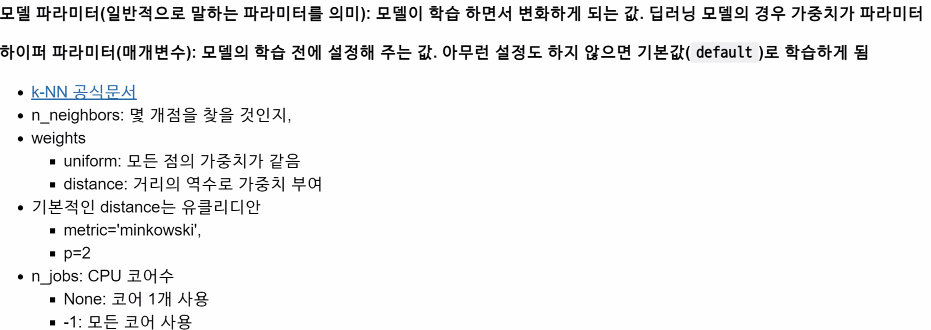

In [74]:
model_knn = KNeighborsClassifier(n_neighbors=4) #, weights="uniform", n_jobs=-1, metric='minkowski', p=2) # distance 는 가까울수록 점수가 높아야 되므로 역수로 부여한다.
model_knn.fit(x_train.values,y_train.values)
predi_knn = model_knn.predict(x_test.values)

print(metrics.accuracy_score(predi_knn, y_test))

# model_knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
# 여기서 거리를 재는 방법 민코프스키의 p=2 유클리디언이랑 같다.


0.9555555555555556


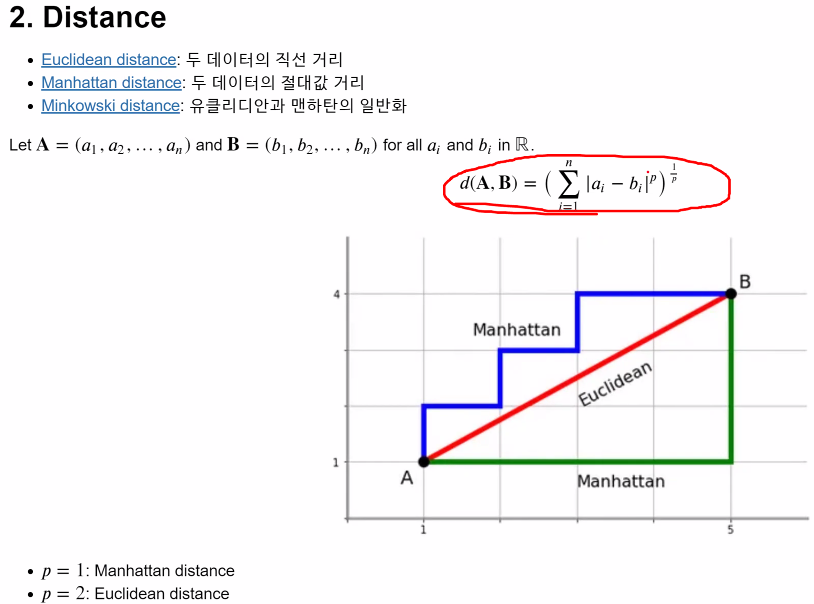

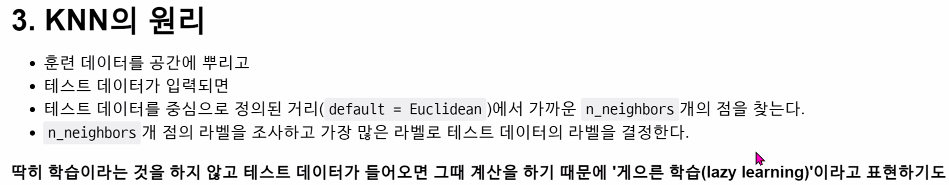

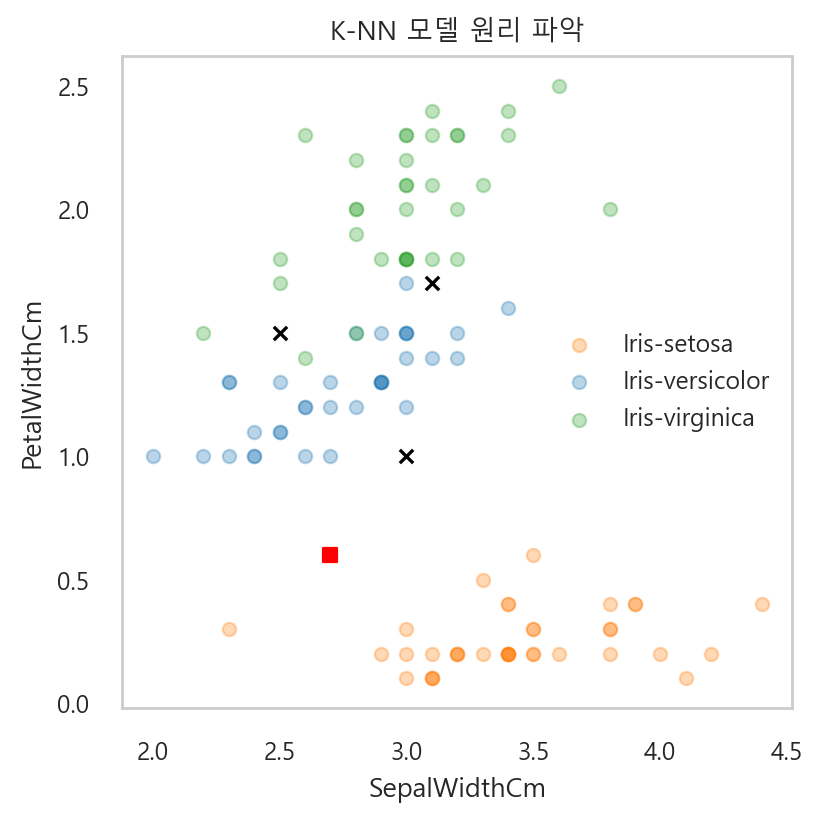

In [75]:
feature_x = width_col[0]
feature_y = width_col[1]

fig, ax = plt.subplots(figsize=(4, 4))

iris_train = iris.loc[x_train.index]

# train 데이터
for s, c in zip(iris_train["Species"].unique(), ["tab:orange", "tab:blue", "tab:green"]):
    ax.scatter(iris_train[iris_train["Species"] == s][feature_x],
               iris_train[iris_train["Species"] == s][feature_y],
               color=c,
               alpha=0.3,
               label=s)

ax.set(xlabel=feature_x,
       ylabel=feature_y,
       title="K-NN 모델 원리 파악")
ax.grid()
ax.legend()

# 임의의 테스트 데이터
test_data_x = np.array([[3.0, 1.0],
                     [2.5, 1.5],
                     [3.1, 1.7]])

ax.scatter(x = test_data_x[:, 0], 
           y = test_data_x[:, 1], 
           color = "black", 
           marker = "x")

test_data_s = np.array([[2.7, 0.6]])

ax.scatter(x = test_data_s[:, 0], 
           y = test_data_s[:, 1], 
           color = "red", 
           marker = "s")

pass

In [76]:
model_knn.predict(test_data_x)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [77]:
model_knn.predict_proba(test_data_x) # sci-kit leanr의 proba는 각라벨의 확률로 준다.

array([[0.  , 1.  , 0.  ],
       [0.  , 0.5 , 0.5 ],
       [0.  , 0.25, 0.75]])

In [78]:
model_knn.predict(test_data_s)

array(['Iris-setosa'], dtype=object)

In [79]:
model_knn.predict_proba(test_data_s)

array([[0.5, 0.5, 0. ]])

## dsecision tree

In [80]:
iris = pd.read_csv("../datas/Iris.csv", index_col=0)

In [81]:
x_data = iris[iris.columns[:-1]]
y_data = iris["Species"]

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.3,
                                                    random_state=97,
                                                    )# stratify=y_data) # 모든 데이터의 샘플링 비율을 동일하게 가져간다.

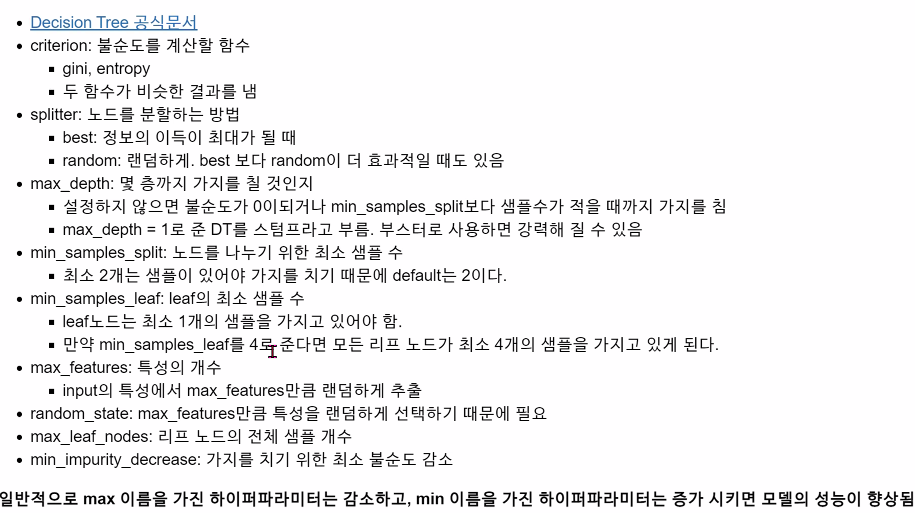

In [83]:
model = DecisionTreeClassifier(max_depth=3, random_state=97)
model.fit(x_train.values, y_train.values)
prediction = model.predict(x_test.values)

print(metrics.accuracy_score(prediction, y_test))

0.8888888888888888


In [84]:
model.tree_.node_count
model.tree_.n_node_samples
model.tree_.n_classes

array([3], dtype=int64)

### dt 해석

In [85]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.feature_selection import mutual_info_classif

In [86]:
model.feature_importances_

array([0.        , 0.        , 0.44004076, 0.55995924])

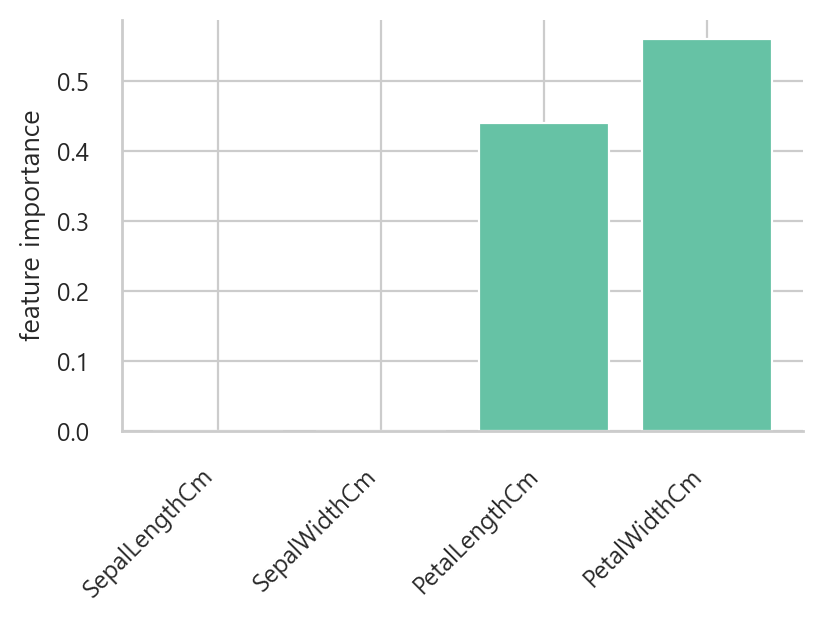

In [87]:
fig,ax = plt.subplots(figsize=(4,3))

ax.bar(iris.columns[:-1], model.feature_importances_)
ax.spines[["top","right"]].set_visible(False)
ax.set(ylabel = "feature importance")

plt.setp(ax.get_xticklabels(),ha="right", rotation = 45);

In [88]:
img = export_graphviz(model, out_file="../img/decision_tree.dot")

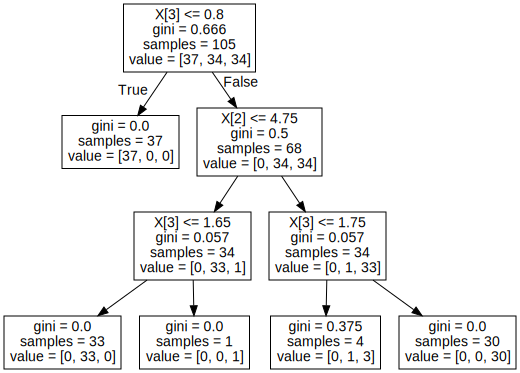

In [89]:
with open("../img/decision_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


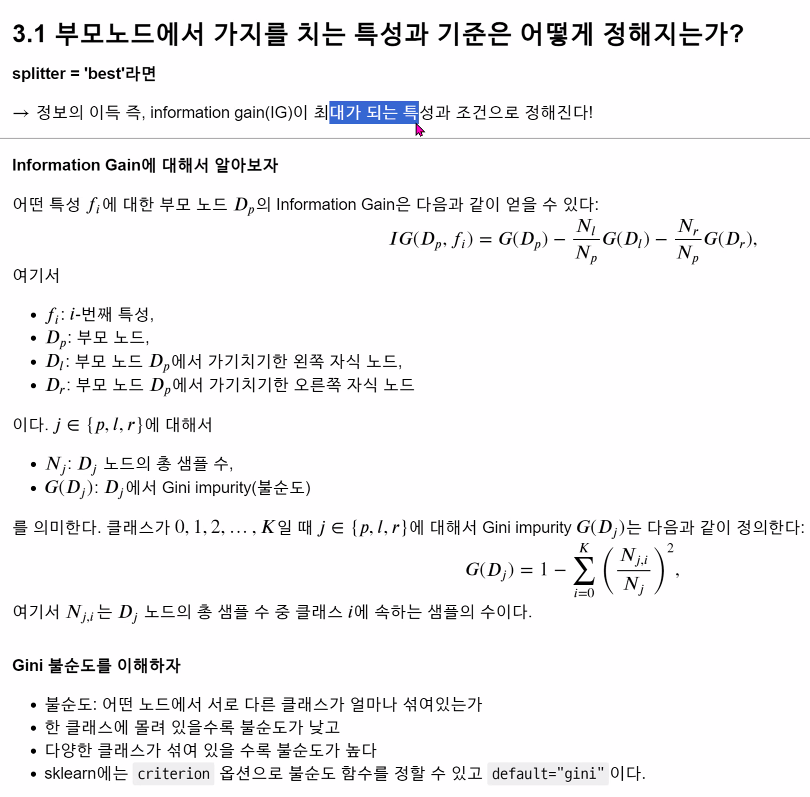

### 지니 불순도의 이해

In [90]:
n_1 = [0,34,34]
n_2 = [0,33,1]
n_3 = [0,1,33]

def IG_(n_1,n_2,n_3):
    
    G = 1 - (n_1[0]/sum(n_1))**2 - (n_1[1]/sum(n_1))**2 - (n_1[2]/sum(n_1))**2

    G_2 = 1 - (n_2[0]/sum(n_2))** 2 - (n_2[1]/sum(n_2))** 2 - (n_2[2]/sum(n_2)) ** 2
    G_3 = 1 - (n_3[0]/sum(n_3))** 2 - (n_3[1]/sum(n_3))** 2 - (n_3[2]/sum(n_3)) ** 2

    return G - (sum(n_2)/sum(n_1)) * G_2 - (sum(n_3)/sum(n_1)) * G_3


# IG(이득 information gain) 이 최대가 되는 지점을 조건으로 하여금 가지를 친다. 즉 불순도가 낮을때
IG_(n_1,n_2,n_3)

0.44290657439446357

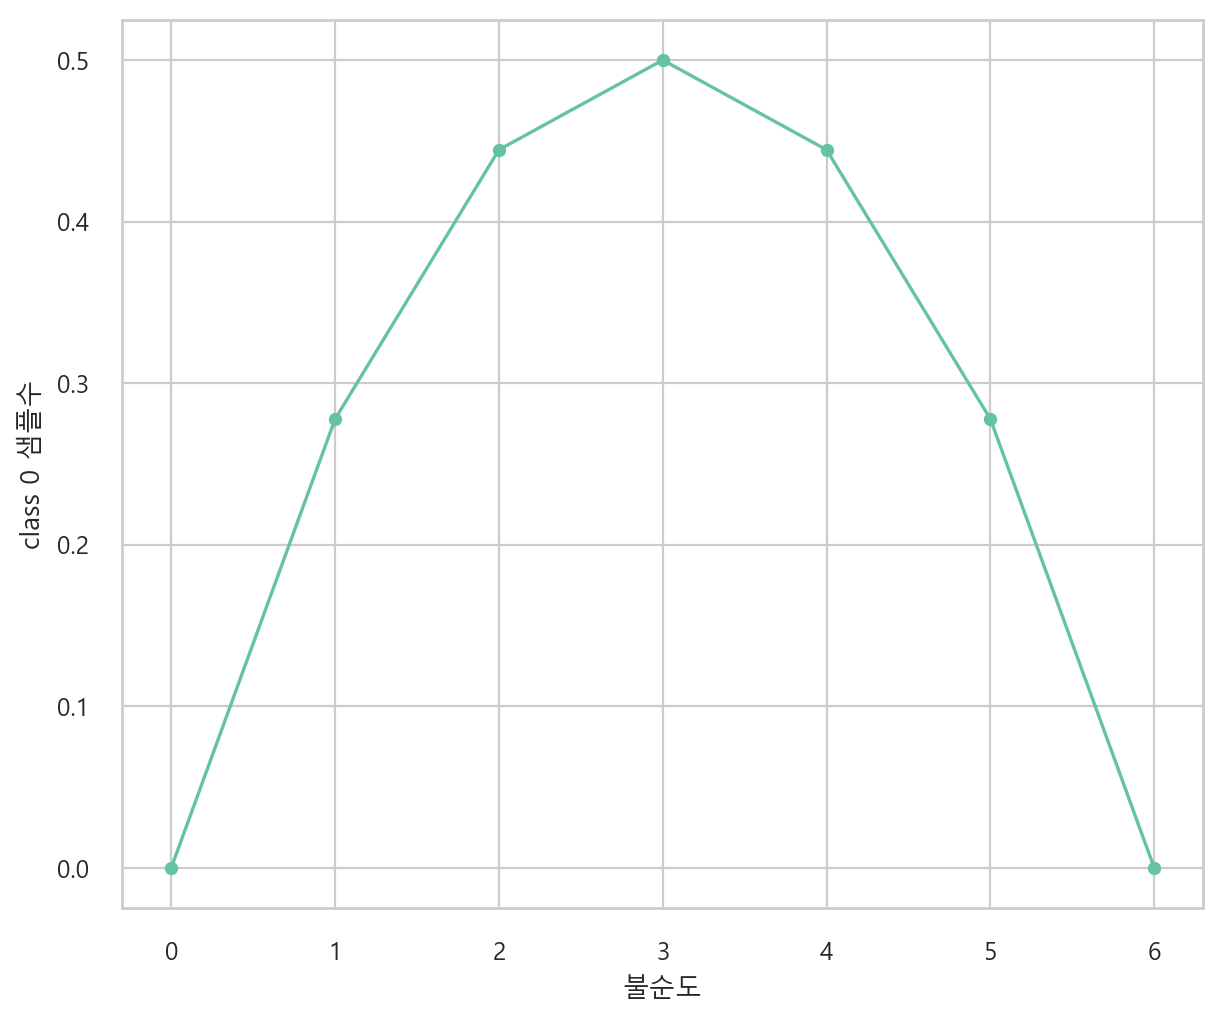

In [91]:
# 클래스가 2개일때
n = 6
i = np.arange(7)
gini = 1 - (i/n) ** 2 - ((n-i)/n) ** 2

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(i, gini, marker = "o")
ax.set(xlabel= "불순도", ylabel= "class 0 샘플수");

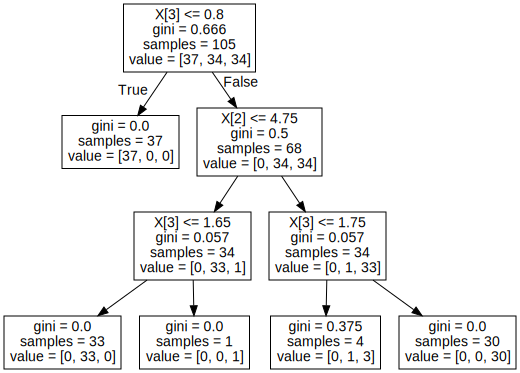

In [92]:
graphviz.Source(dot_graph)

In [93]:
x_test.iloc[12]

SepalLengthCm    6.3
SepalWidthCm     2.5
PetalLengthCm    4.9
PetalWidthCm     1.5
Name: 73, dtype: float64

In [94]:
model.predict(x_test.values)[12]
model.predict_proba(x_test.values)[12]

array([0.  , 0.25, 0.75])

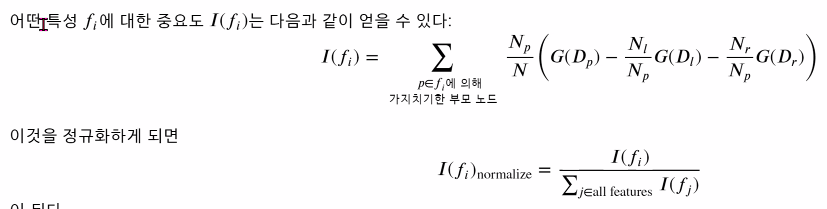

In [95]:
model.feature_importances_

array([0.        , 0.        , 0.44004076, 0.55995924])

In [96]:
# 피쳐 임포턴스
f_2 = (68/105) * (0.5 - 34/68 * (0.057) - 34/68 *(0.057))

f_3 = (105/105) * (0.666 - 37/105 * (0.0)   - 68/105 * (0.5)) +\
      (34/105)  * (0.057 - 33/34  * (0.0)   - 1/34   *(0.0))  +\
      (34/105)  * (0.057 - 4/34   * (0.375) - 30/34  *(0.0))

model.feature_importances_ - np.array([0,0,f_2, f_3]) / (f_2 + f_3)

array([ 0.        ,  0.        , -0.00017552,  0.00017552])

### 숙제

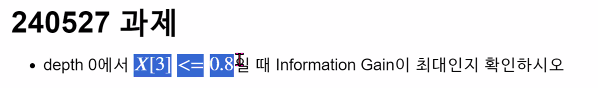

In [97]:
threshold = model.tree_.threshold
node_samples = model.tree_.n_node_samples
impurity = model.tree_.impurity
value = model.tree_.value
threshold = np.maximum(0,np.array(threshold))
print(f"""
 # 노드별 총 샘플수
{node_samples}

 # 각 노드의 gini
{impurity}

# 각 노드의 갯수
{value} 

# IG
{threshold} 
""")


 # 노드별 총 샘플수
[105  37  68  34  33   1  34   4  30]

 # 각 노드의 gini
[0.66612245 0.         0.5        0.05709343 0.         0.
 0.05709343 0.375      0.        ]

# 각 노드의 갯수
[[[37. 34. 34.]]

 [[37.  0.  0.]]

 [[ 0. 34. 34.]]

 [[ 0. 33.  1.]]

 [[ 0. 33.  0.]]

 [[ 0.  0.  1.]]

 [[ 0.  1. 33.]]

 [[ 0.  1.  3.]]

 [[ 0.  0. 30.]]] 

# IG
[0.80000001 0.         4.75       1.65000004 0.         0.
 1.75       0.         0.        ] 



In [98]:
def IG_(n_1,n_2,n_3):
    
    G = 1 - (n_1[0]/sum(n_1))**2 - (n_1[1]/sum(n_1))**2 - (n_1[2]/sum(n_1))**2

    G_2 = 1 - (n_2[0]/sum(n_2))** 2 - (n_2[1]/sum(n_2))** 2 - (n_2[2]/sum(n_2)) ** 2
    G_3 = 1 - (n_3[0]/sum(n_3))** 2 - (n_3[1]/sum(n_3))** 2 - (n_3[2]/sum(n_3)) ** 2

    return G - (sum(n_2)/sum(n_1)) * G_2 - (sum(n_3)/sum(n_1)) * G_3


# IG(이득 information gain) 이 최대가 되는 지점을 조건으로 하여금 가지를 친다. 즉 불순도가 낮을때
IG_(n_1,n_2,n_3)

0.44290657439446357

# 과제 시작

In [99]:
iris = pd.read_csv("../datas/Iris.csv",
                   index_col = 0)

x_data = iris[iris.columns[:-1]]
y_data = iris["Species"]

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.30,
                                                    random_state = 97)

model = DecisionTreeClassifier(max_depth = 3, random_state=97) 
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier(max_depth=3, random_state=97)

In [100]:
data = pd.concat([x_train,y_train],axis=1)

In [101]:
def call_n(total_under): 
    n = []
    
    n.append(len(total_under[total_under["Species"] == "Iris-setosa"]))
    n.append(len(total_under[total_under["Species"] == "Iris-versicolor"]))
    n.append(len(total_under[total_under["Species"] == "Iris-virginica"]))
    return n


# 컬럼 기준으로 i 값을 변화시키면서 IG 값 구하기 위한 함수
def cal_IG(col_name,i): 
    df_r = data[data[col_name] > i]
    df_l = data[data[col_name] <= i]


    n_r = call_n(df_r)
    n_l = call_n(df_l)
    total = np.array(n_r) + np.array(n_l)

    # 0 디비전 에러
    if (np.sum(total)==0) or (sum(n_r)==0) or (sum(n_l)==0):
        return 0

    GD_0 = 1 - (total[0]/np.sum(total)) ** 2 - (total[1]/np.sum(total)) ** 2 - (total[2]/np.sum(total)) ** 2
    GD_r = 1 - (n_r[0]/sum(n_r)) ** 2 - (n_r[1]/sum(n_r)) ** 2 - (n_r[2]/sum(n_r)) ** 2
    GD_l = 1 - (n_l[0]/sum(n_l)) ** 2 - (n_l[1]/sum(n_l)) ** 2 - (n_l[2]/sum(n_l)) ** 2

    IG = GD_0 - sum(n_l)/np.sum(total) * GD_l - sum(n_r)/np.sum(total) * GD_r 
    return IG

list_by_col = []
for col_name in data.columns[:-1]:
    dict_ = {}
    
    # 여기서 0 부터 10까지 하려고 하다가 디비전 에러도 뜨고,
    # 그래프에 줄이 생겨 바꿈
    from_ = data[col_name].min()
    to_   = data[col_name].max()
    for i in np.arange(from_,to_,0.01):
        dict_[i]=cal_IG(col_name,i)
    list_by_col.append(dict_)

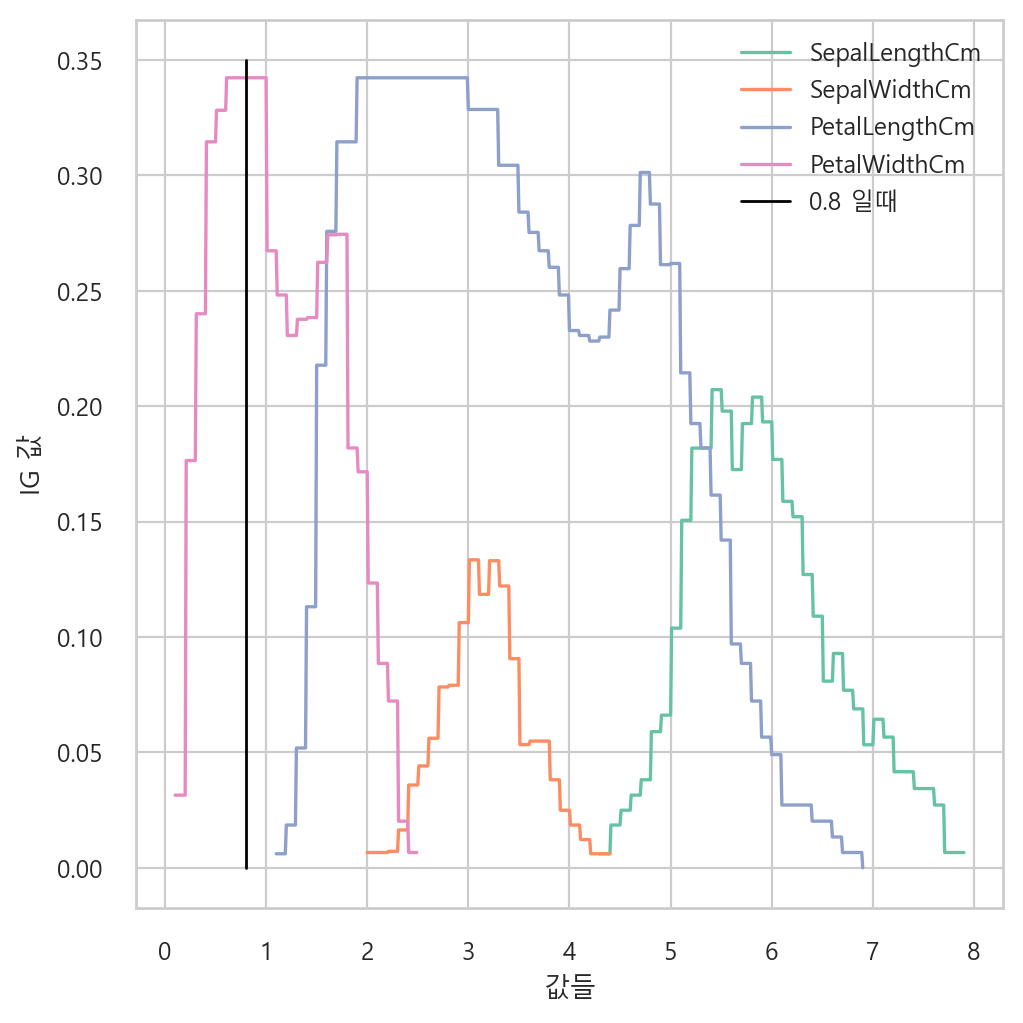

In [102]:
# 위의 for 문 안에 넣었어도 됬을거같기도하고
fig, ax = plt.subplots(figsize=(5,5))

for i in range(4):
    sns.lineplot(x=list_by_col[i].keys(),
                 y=list_by_col[i].values(),
                 label = data.keys()[i],
                 ax=ax)

sns.lineplot(x=[0.8, 0.8], y=[0, 0.35],
             color="black",
             estimator=None,
             linewidth=1,
             label = "0.8 일때",
             ax=ax)

ax.set(xlabel="값들",ylabel="IG 값");

## 정답 코드
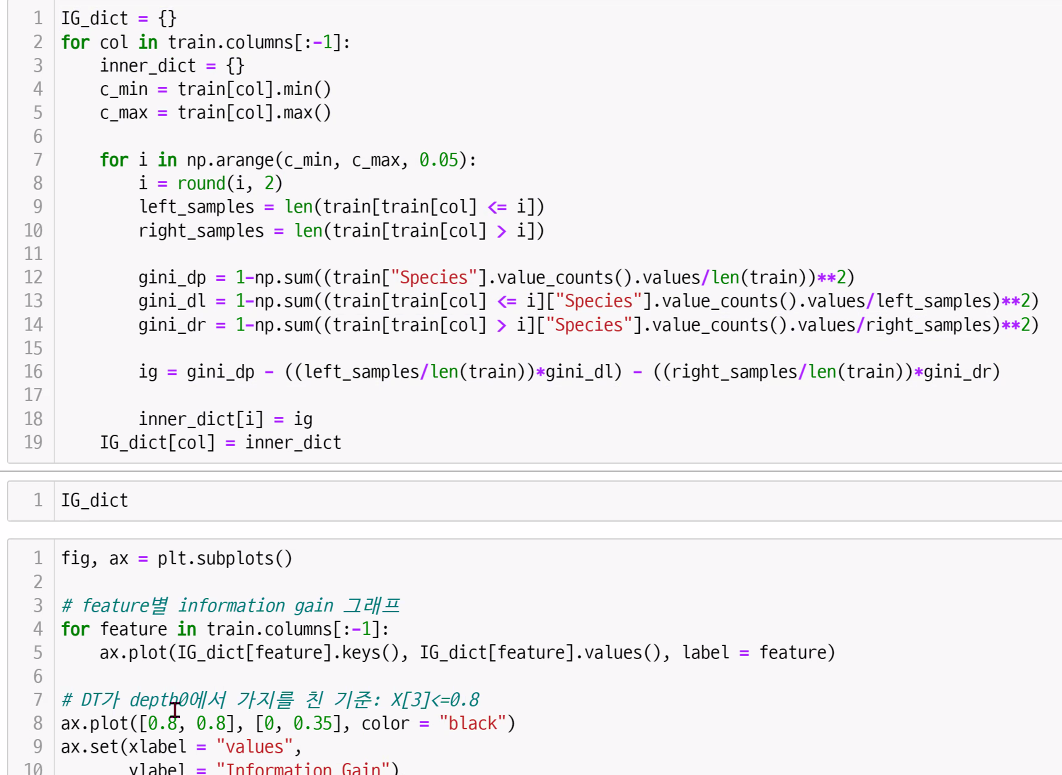